<a href="https://colab.research.google.com/github/ruchisurya2002-maker/Analytics-Projects-/blob/main/Complete_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel("/content/placement.xlsx")

We use Pandas to read excel files

In [ ]:
data


,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [ ]:
data.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


This is Descriptive Statistics of the data

In [ ]:
# prompt: check for missing values

data.isnull().sum()


,0
cgpa,0
package,0


No missing values in the dataset

In [ ]:
# Check for duplicates across all columns
duplicates = data[data.duplicated()]

if duplicates.empty:
  print("No duplicates found.")
else:
  print("Duplicates found:")
duplicates


No duplicates found.


,cgpa,package


No duplicate values in the dataset

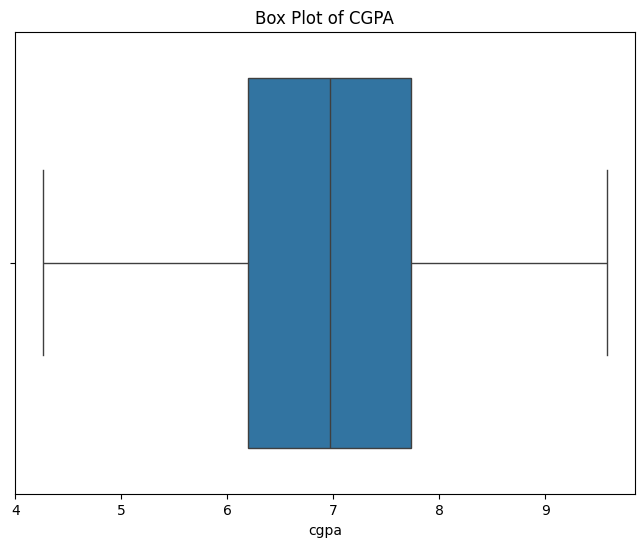

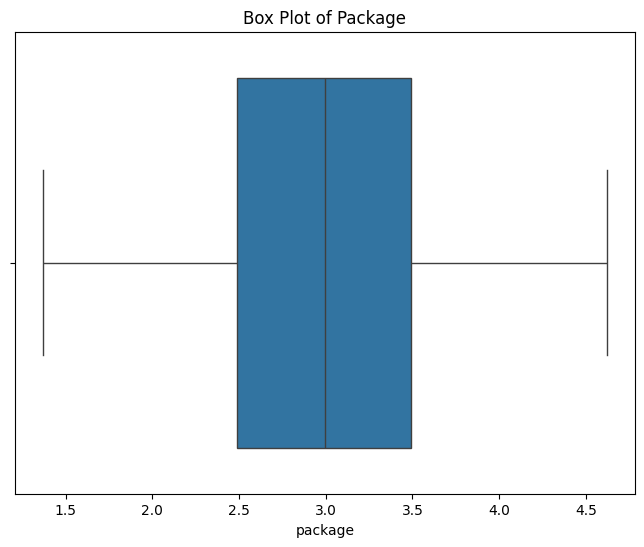

In [ ]:
# prompt: Generate box plot for cgpa and package seperately

import matplotlib.pyplot as plt
import seaborn as sns

# Generate box plot for CGPA
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['cgpa'])
plt.title('Box Plot of CGPA')
plt.show()

# Generate box plot for Package
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['package'])
plt.title('Box Plot of Package')
plt.show()


Interpretation

Box plot is the way to check for outliers in our data, data consists of no outliers.

In [ ]:
# prompt: check for outliers

# Assuming 'data' DataFrame is already loaded as in the previous code.

# Identify outliers using IQR method for 'cgpa'
Q1_cgpa = data['cgpa'].quantile(0.25)
Q3_cgpa = data['cgpa'].quantile(0.75)
IQR_cgpa = Q3_cgpa - Q1_cgpa
lower_bound_cgpa = Q1_cgpa - 1.5 * IQR_cgpa
upper_bound_cgpa = Q3_cgpa + 1.5 * IQR_cgpa

cgpa_outliers = data[(data['cgpa'] < lower_bound_cgpa) | (data['cgpa'] > upper_bound_cgpa)]

print("CGPA Outliers:")
print("No outliers Found")

# Identify outliers using IQR method for 'package'
Q1_package = data['package'].quantile(0.25)
Q3_package = data['package'].quantile(0.75)
IQR_package = Q3_package - Q1_package
lower_bound_package = Q1_package - 1.5 * IQR_package
upper_bound_package = Q3_package + 1.5 * IQR_package

package_outliers = data[(data['package'] < lower_bound_package) | (data['package'] > upper_bound_package)]

print("\nPackage Outliers:")
print("No outliers Found")


CGPA Outliers:
No outliers Found

Package Outliers:
No outliers Found


Reconfirmed by checking the outliers


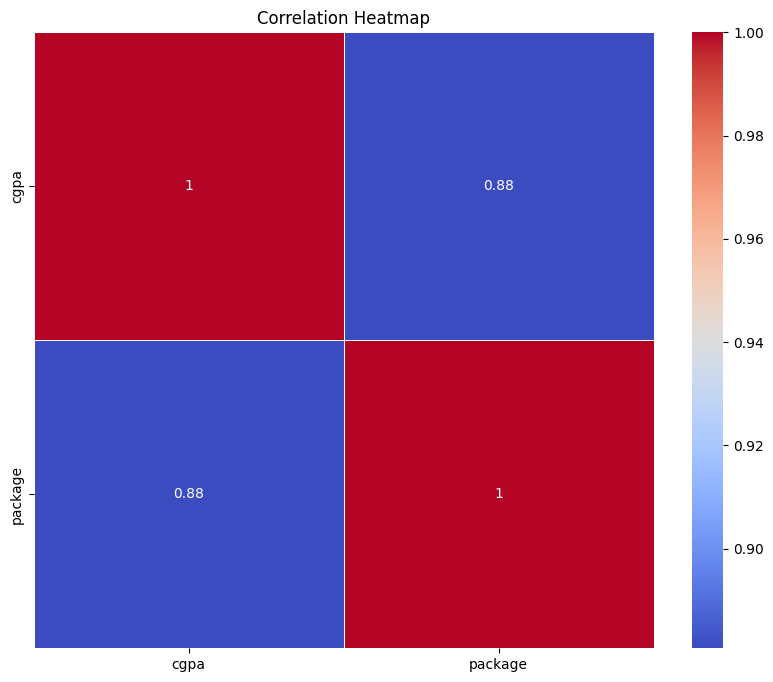

In [ ]:
# prompt: extract heat map on data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in the previous code.
# ... (Your existing code to load the data) ...

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


 **Interpretation**

* The correlation between CGPA and package is 0.88, which indicates a strong positive relationship.
* Higher CGPA is strongly associated with a higher salary package
*  This means that as CGPA increases, the package (salary) tends to increase as well.













In [ ]:
# prompt: let dependent variable y be package and independent variable x be cgpa

# Define features (X) and target variable (y)
x = data[['cgpa']]  # Use double brackets for a DataFrame
y = data['package']



Defining our indepedent (x = cgpa ) and dependent variable (y = package )

In [ ]:
x


,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


checking whether x is defined as CGPA

In [ ]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


Checking whether y is defined as Package

In [ ]:
# prompt: extract simple linear regression on x and y

# Assuming 'x' and 'y' are already defined as in your previous code
import statsmodels.api as sm

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                package   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     684.4
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           3.59e-66
Time:                        09:55:28   Log-Likelihood:                -60.109
No. Observations:                 200   AIC:                             124.2
Df Residuals:                     198   BIC:                             130.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9857      0.154     -6.402      0.0

**Interpretation**

Y = −0.9857+0.5696×CGPA

*  Since the p-value is far below 0.05, **the independent variable is  significant**. This means CGPA has a statistically significant impact on salary packages.
*  R^2= 77.6% of the variation in the salary package is explained by CGPA.
*  Coefficient of CGPA: 0.5696 → Suggests that for every 1 unit increase in CGPA, salary increases by ~0.57 units.
*  Prob (F-statistic) value indicates the **significance of the equation** as a whole, Since the p-value is much lower than 0.05, the regression model is statistically significant, meaning CGPA significantly impacts the salary package.











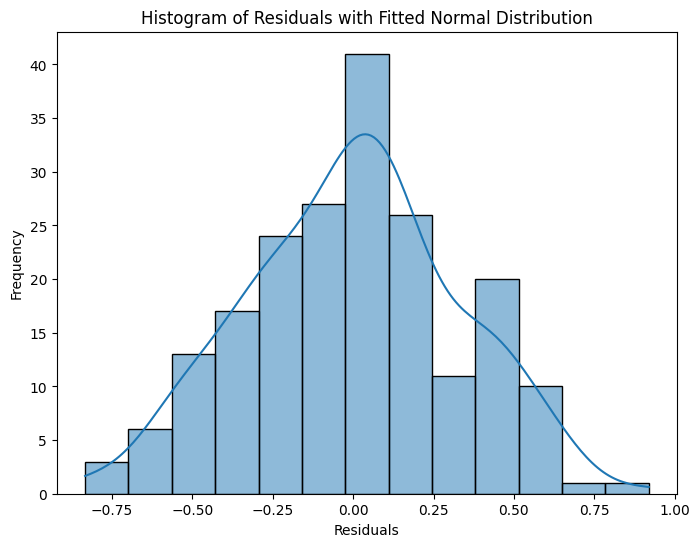

In [ ]:
# prompt: check if the residual is normally distributed , plot histogram with a line

import matplotlib.pyplot as plt
# Assuming 'model' and 'x' are already defined from the previous code.

# Get the residuals
residuals = model.resid

# Plot the histogram of residuals with a fitted normal distribution line
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals with Fitted Normal Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()



**Interpretation**

* The histogram of residuals follows a nearly bell-shaped curve, meaning the residuals are symmetrically distributed around zero.
* Residual analysis is crucial in regression modeling to ensure that the assumptions of Ordinary Least Squares (OLS) regression hold. One of the most important assumptions is that residuals should be normally distributed.



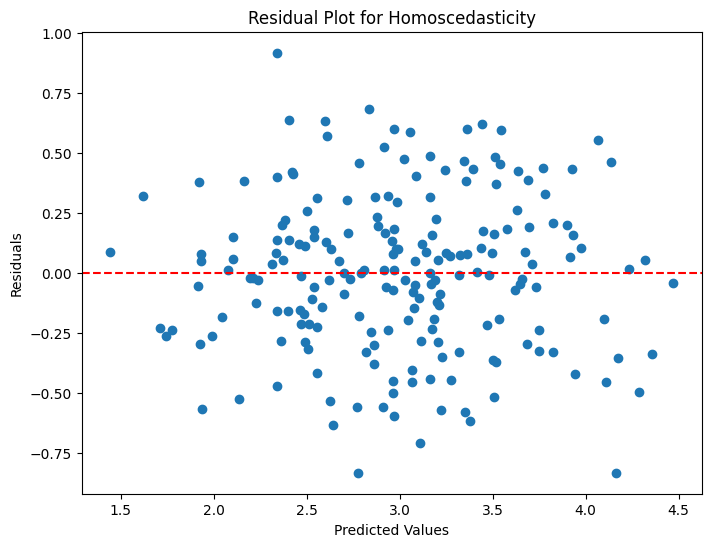

In [ ]:
# prompt: generate histogram for homoscadasticity

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'model' and 'x' are already defined from the previous code.
# Get the predicted values
predicted_values = model.predict(x)

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()


**Interpretation**
* Homoscedasticity refers to the constant variance of residuals. This is a key assumption in linear regression.
* There is no visible pattern, This suggests that variance remains roughly constant, meaning homoscedasticity is satisfied.






In [ ]:
# prompt: conduct white test to see whether linear regression is homoscadiscity or not

# Assuming 'model' and 'x' are already defined from the previous code.
import statsmodels.stats.api as sms
# Perform White's test for heteroscedasticity
white_test = sms.het_white(model.resid, model.model.exog)
print(white_test)
labels = ['Test Statistic', 'P-value', 'F-Statistic', 'F-P-value']
results = list(white_test)
for i in range(len(labels)):
    print(f'{labels[i]}: {results[i]}')

# Interpret the results
alpha = 0.05
if white_test[1] < alpha:
    print("\nReject the null hypothesis. Heteroscedasticity is present.")
else:
    print("\nFail to reject the null hypothesis. Homoscedasticity is assumed.")


(1.400958414847464, 0.4963473934360735, 0.6948392235987099, 0.5003737703258786)
Test Statistic: 1.400958414847464
P-value: 0.4963473934360735
F-Statistic: 0.6948392235987099
F-P-value: 0.5003737703258786

Fail to reject the null hypothesis. Homoscedasticity is assumed.


**Interpretation**
* White test helps determine whether the residuals of a regression model exhibit homoscedasticity.
* since p value is >0.05, we fail to reject null hypothesis, which indicates that residuals are homoscadastic.



Thus we can conclude that the model is siginificant for prediction.